In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import itertools

skip_interval for intersect_m_english is 193
skip_interval for intersect_m_non-english is 2564
skip_interval for intersect_f_english is 262
skip_interval for intersect_f_non-english is 3000


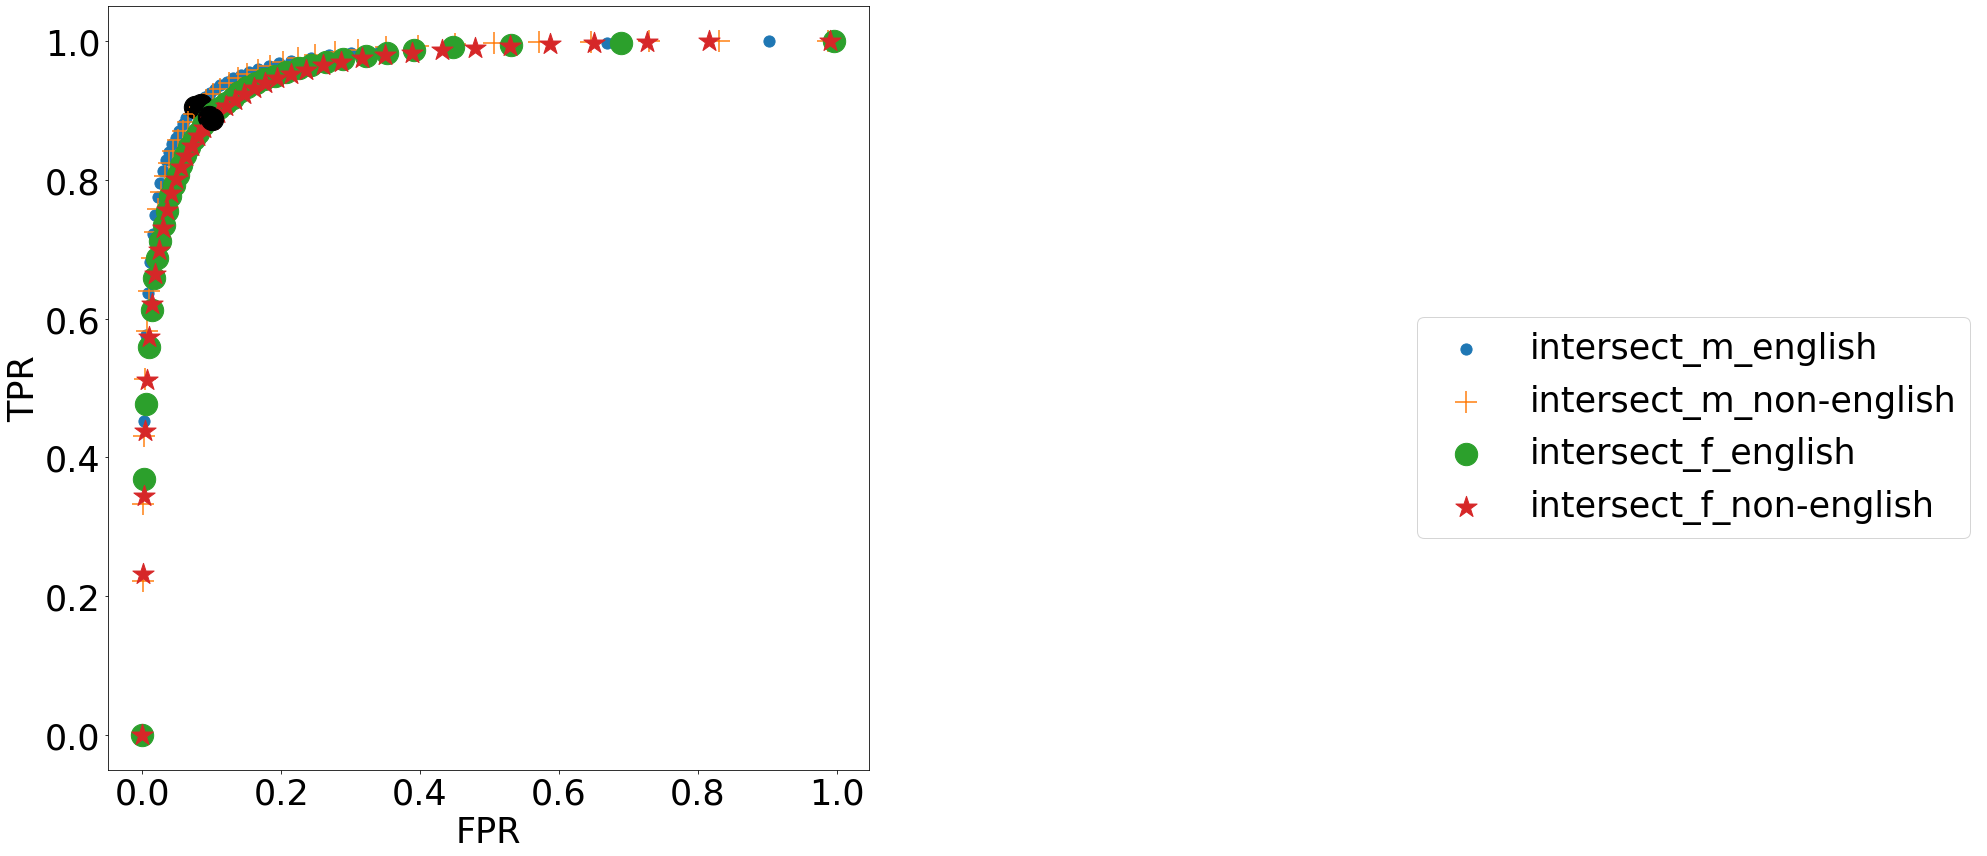

Plotted intersections. Missing data for intersections: []
skip_interval for intersect_m_Australia is 3137
skip_interval for intersect_m_India is 4589
skip_interval for intersect_m_Norway is 1911
skip_interval for intersect_m_Ireland is 2005
skip_interval for intersect_m_Germany is 575
skip_interval for intersect_m_NewZealand is 1506
skip_interval for intersect_m_Italy is 37
skip_interval for intersect_m_Mexico is 251
skip_interval for intersect_m_Spain is 63
skip_interval for intersect_m_Switzerland is 82
skip_interval for intersect_m_Chile is 43
skip_interval for intersect_m_USA is 308
skip_interval for intersect_m_UK is 1243
skip_interval for intersect_m_Canada is 1718
skip_interval for intersect_f_Australia is 949
skip_interval for intersect_f_India is 5226
skip_interval for intersect_f_Norway is 643
skip_interval for intersect_f_Ireland is 250
skip_interval for intersect_f_Germany is 413
skip_interval for intersect_f_Italy is 143
skip_interval for intersect_f_Sweden is 237
skip_int

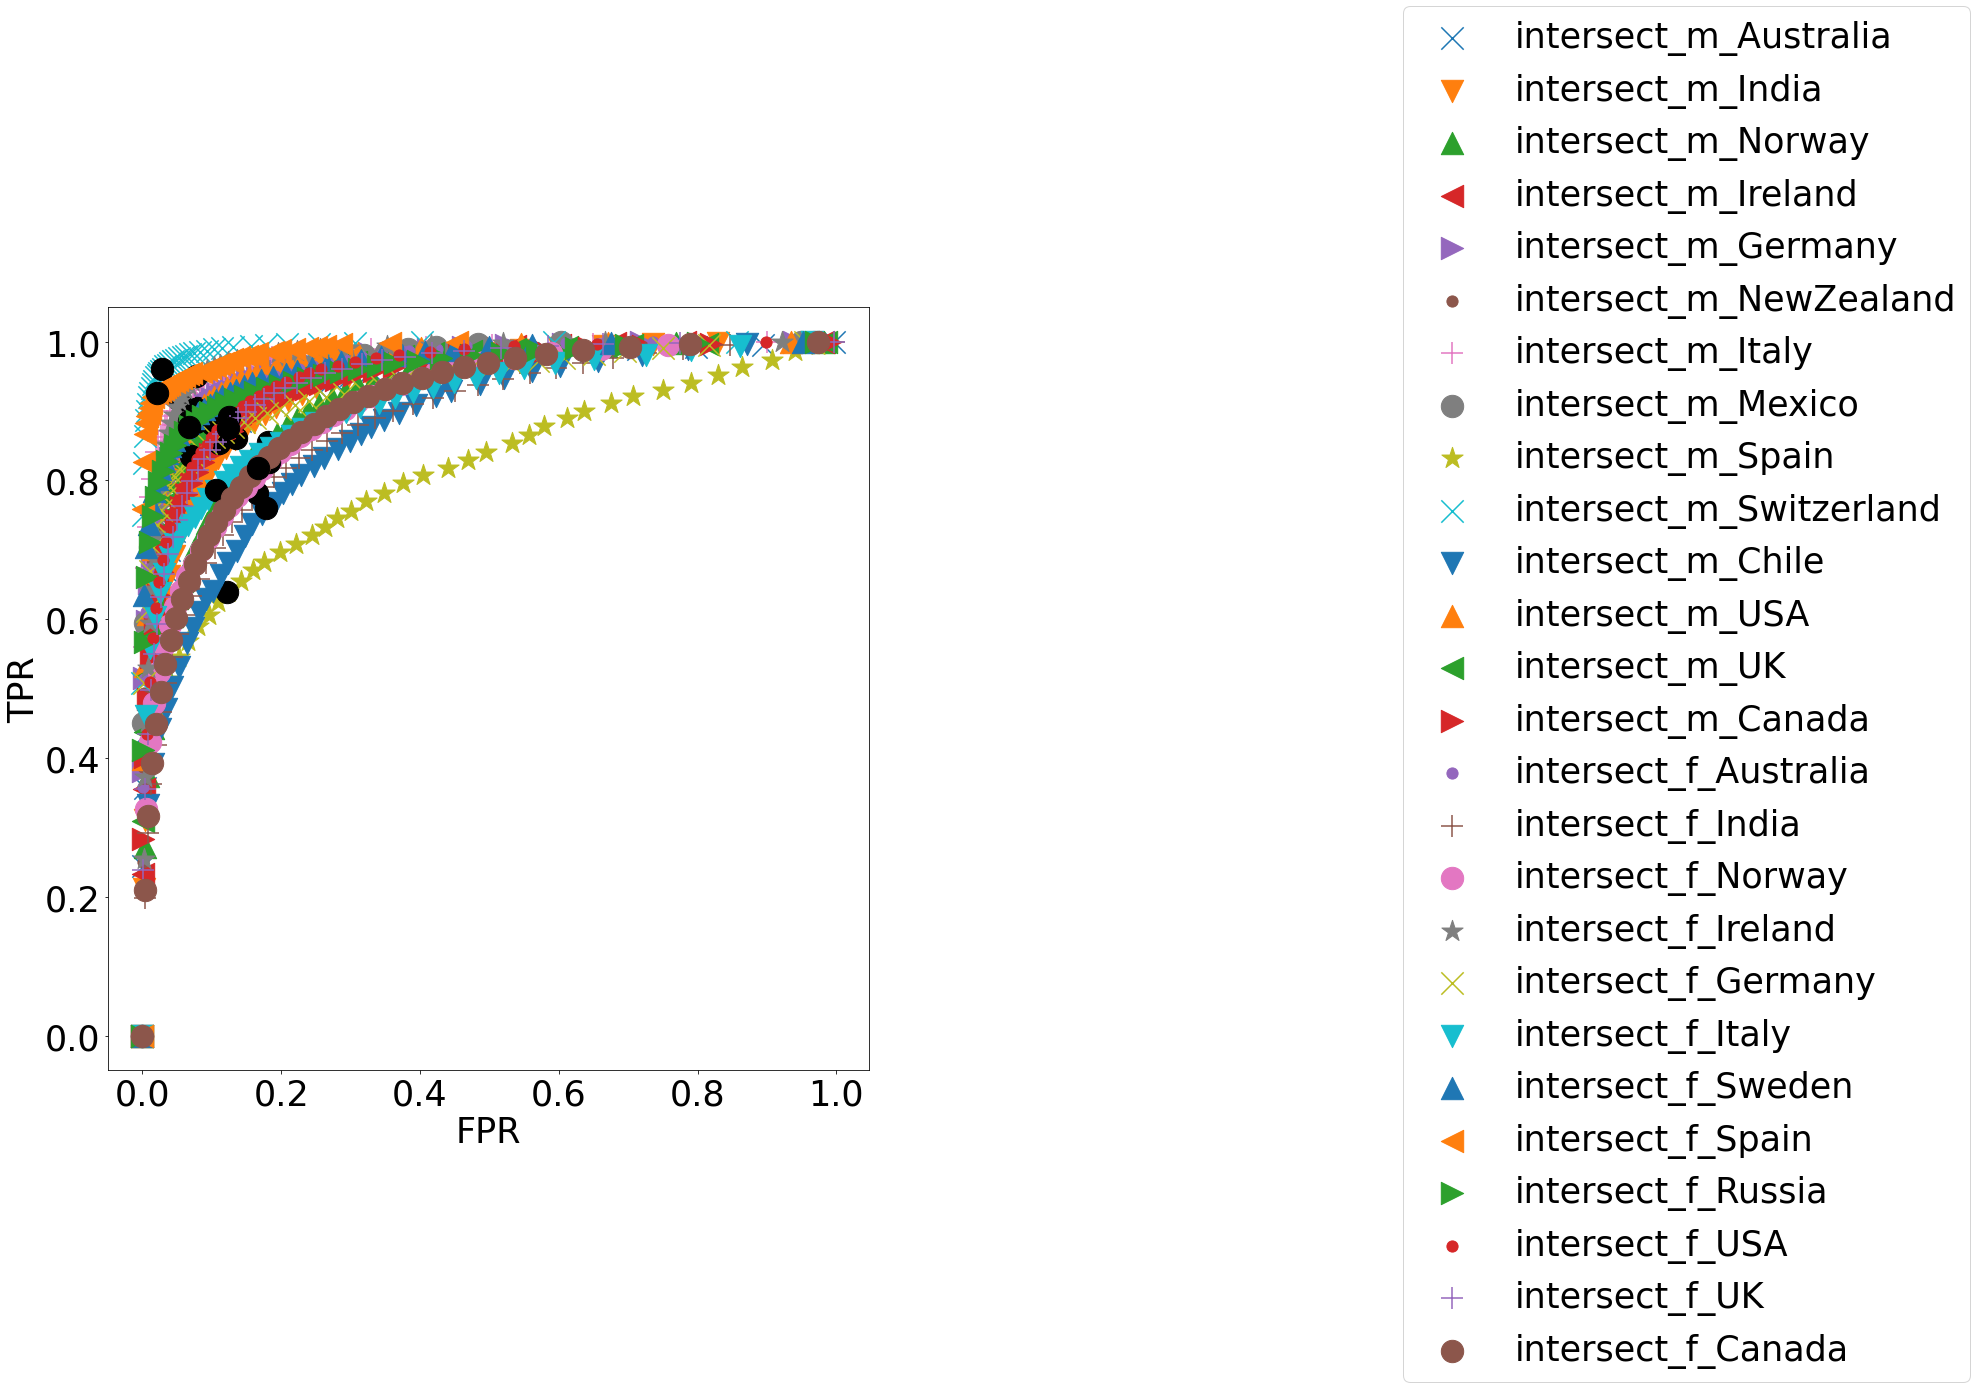

Plotted intersections. Missing data for intersections: ['intersect_m_Sweden', 'intersect_m_Russia', 'intersect_m_Philippines', 'intersect_m_Croatia', 'intersect_m_Denmark', 'intersect_m_Netherlands', 'intersect_m_Poland', 'intersect_m_Portugal', 'intersect_m_China', 'intersect_m_France', 'intersect_m_Guyana', 'intersect_m_Singapore', 'intersect_m_Brazil', 'intersect_m_SriLanka', 'intersect_m_SouthAfrica', 'intersect_m_South Korea', 'intersect_m_TrinidadandTobago', 'intersect_m_Pakistan', 'intersect_m_Austria', 'intersect_m_Israel', 'intersect_m_Iran', 'intersect_m_Sudan', 'intersect_f_NewZealand', 'intersect_f_Mexico', 'intersect_f_Switzerland', 'intersect_f_Chile', 'intersect_f_Philippines', 'intersect_f_Croatia', 'intersect_f_Denmark', 'intersect_f_Netherlands', 'intersect_f_Poland', 'intersect_f_Portugal', 'intersect_f_China', 'intersect_f_France', 'intersect_f_Guyana', 'intersect_f_Singapore', 'intersect_f_Brazil', 'intersect_f_SriLanka', 'intersect_f_SouthAfrica', 'intersect_f_Sou

In [38]:
# @brief Return list of tuples of all combinations of keys in
#        the sensitive param provided as args
def get_intersection_combos(*sensitive_param_value_groups):
    return list(itertools.product(*sensitive_param_value_groups))

markers = itertools.cycle(('.', '+', 'o', '*', 'x', 'v', '^', '<', '>'))

# @brief Plot roc curve from intersection names
def plot_roc(intersections_values):
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(121)
    plt.rcParams.update({'font.size': 35})
    
    missing_intersections = []
    
    for intersection_values in intersections_values:
        intersection_name = f"intersect_{'_'.join(intersection_values)}"
        try:
            tpr = np.array(results[f"{intersection_name}_tpr"])
            fpr = np.array(results[f"{intersection_name}_fpr"])
            thresholds = np.array(results[f"{intersection_name}_thresholds"])
            best_equal_error = np.argmax(tpr - fpr)
            # plot roc
            n_plot_points = 40
            skip_interval = int(len(fpr)/n_plot_points)
            print(f"skip_interval for {intersection_name} is {skip_interval}")
            ax.scatter(fpr[::skip_interval], tpr[::skip_interval],
                       label=intersection_name, marker=next(markers), s=500)
            # plot optimal point for equal error
            ax.scatter(fpr[best_equal_error], tpr[best_equal_error], marker='o',
                       color='black', s=500)
        except KeyError:
            missing_intersections.append(intersection_name)
        
    ax.set_aspect(1)
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    fig.legend(loc='center right')
    plt.show()
    print(f"Plotted intersections. Missing data for intersections: {missing_intersections}")

# all sensitive param values
gender_values = ['m', 'f']
nationality_values = ['Australia', 'India', 'Norway', 'Ireland', 'Germany', 'NewZealand', 'Italy','Mexico',\
                  'Sweden', 'Spain', 'Russia', 'Switzerland', 'Chile', 'Philippines', 'Croatia', 'Denmark',\
                  'Netherlands', 'Poland', 'Portugal', 'China', 'France', 'Guyana', 'Singapore', 'Brazil',\
                  'SriLanka', 'SouthAfrica', 'South Korea', 'TrinidadandTobago', 'Pakistan', 'Austria',\
                  'Israel', 'Iran', 'Sudan', 'USA', 'UK', 'Canada']
native_lang_values = ['english', 'non-english']
native_lang_map_full = {'Australia': 'English', 'India': 'Hindi', 'Norway': 'Norwegian', 'Ireland': 'English', 'Germany': 'German', 'New Zealand': 'English', 'Italy': 'Italian','Mexico': 'Spanish',\
                  'Sweden': 'Swedish', 'Spain': 'Spanish', 'Russia': 'Russian', 'Switzerland': 'Mixed', 'Chile': 'Spanish', 'Philippines': 'English', 'Croatia': 'Croatian', 'Denmark': 'Danish',\
                  'Netherlands': 'Dutch', 'Poland': 'Polish', 'Portugal': 'Portuguese', 'China': 'Mandarin', 'France': 'French', 'Guyana': 'English', 'Singapore': 'English', 'Brazil': 'Portuguese',\
                  'Sri Lanka': 'Sinhala', 'South Africa': 'Afrikaans', 'South Korea': 'Korean', 'Trinidad and Tobago': 'English', 'Pakistan': 'English', 'Austria': 'German',\
                  'Israel': 'Hebrew', 'Iran': 'Persian', 'Sudan': 'Arabic', 'USA': 'English', 'UK': 'English', 'Canada': 'English'}
country_to_n_speakers_map = {'Australia': 'English', 'India': 'Hindi', 'Norway': 'Norwegian', 'Ireland': 'English', 'Germany': 'German', 'New Zealand': 'English', 'Italy': 'Italian','Mexico': 'Spanish',\
                  'Sweden': 'Swedish', 'Spain': 'Spanish', 'Russia': 'Russian', 'Switzerland': 'Mixed', 'Chile': 'Spanish', 'Philippines': 'English', 'Croatia': 'Croatian', 'Denmark': 'Danish',\
                  'Netherlands': 'Dutch', 'Poland': 'Polish', 'Portugal': 'Portuguese', 'China': 'Mandarin', 'France': 'French', 'Guyana': 'English', 'Singapore': 'English', 'Brazil': 'Portuguese',\
                  'Sri Lanka': 'Sinhala', 'South Africa': 'Afrikaans', 'South Korea': 'Korean', 'Trinidad and Tobago': 'English', 'Pakistan': 'English', 'Austria': 'German',\
                  'Israel': 'Hebrew', 'Iran': 'Persian', 'Sudan': 'Arabic', 'USA': 'English', 'UK': 'English', 'Canada': 'English'}
native_lang_values_full = list(set(native_lang_map_full.values()))

gender_nationality_intersections = get_intersection_combos(gender_values, nationality_values)
#gender_native_lang_intersections = get_intersection_combos(gender_values, native_lang_values)

with open('/home/jupyter/voxceleb-fairness/data/roc/roc_intersect.json', 'r') as fp:
    results = json.load(fp)
    #print(results.keys())
    
    # plot Gender / Native-Lang intersection ROC
    #plot_roc(gender_native_lang_intersections)
    
    # plot Gender / Country intersection ROC
    plot_roc(gender_nationality_intersections)


In [5]:
female_thresholds[best_female]

-0.9540587067604065

In [6]:
male_thresholds[best_male]

-0.961061418056488

In [7]:
corres_f_idx = female_thresholds.size - np.searchsorted(female_thresholds[::-1], male_thresholds[best_male], side="right")

In [16]:
female_thresholds

array([ 0.54973137, -0.45026863, -0.63686866, ..., -1.38935709,
       -1.38976276, -1.44067478])

In [9]:
female_fpr[best_female], female_tpr[best_female]

(0.11248993828816743, 0.9043131204722297)

In [10]:
female_fpr[corres_f_idx], female_tpr[corres_f_idx]

(0.12523477327609336, 0.9143077542259189)

In [11]:
corres_m_idx = male_thresholds.size - np.searchsorted(male_thresholds[::-1], female_thresholds[best_female], side="right")

In [12]:
male_fpr[best_male], male_tpr[best_male]

(0.08221565507312267, 0.9100553156020308)

In [13]:
male_fpr[corres_m_idx], male_tpr[corres_m_idx]

(0.07293324240357657, 0.8994847313783436)

In [14]:
metrics.auc(male_fpr, male_tpr)

0.9725159091331507

In [15]:
metrics.auc(female_fpr, female_tpr)

0.96272171761781